In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-71.24977582271426, -140.7031561627961),
 (-50.50802967344485, -48.546042478584496),
 (5.249943200171998, -138.7309638095498),
 (-18.053923047558925, -147.89764699553996),
 (-46.092359550416916, 104.85620447007403),
 (-19.32863670799715, -125.21986634039934),
 (-18.638495630473244, 132.25513886464756),
 (-34.10488021695952, -13.851369694132075),
 (-53.05674785052462, -175.20077228506102),
 (49.82067445247284, -79.62129937425065),
 (30.774193808242302, -71.36100168403247),
 (-51.55865198842461, -168.39519833938115),
 (-51.938126571477206, -121.35269657549492),
 (-27.935047918935112, 87.85244156393304),
 (-83.24712213381636, -1.4061488660244095),
 (-12.216581682807373, -92.156277836882),
 (-78.94908401581696, -140.4117317655609),
 (67.3284500127346, -48.26031233481174),
 (77.6604484928053, -53.72721449632161),
 (-43.20887375900558, -103.78476790442478),
 (-71.58860106494438, 120.0855509897915),
 (76.9194674446588, 47.04875000871621),
 (-29.860542702387328, 10.895191870423133),
 (34.895

In [13]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#   print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
    

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#city_url = url + "&q=" + "Boston"
#city_weather = requests.get(city_url)


In [ ]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Begining of Data Retrivel")
print("-------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    city_weather = requests.get(city_url).json()
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
                            

In [63]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tautira,-17.73,-149.15,80.60,65,75,8.05,PF,2020-08-20 00:13:20
1,Tasiilaq,65.61,-37.64,44.60,75,0,12.75,GL,2020-08-20 00:13:20
2,Punta Arenas,-53.15,-70.92,44.60,75,83,26.40,CL,2020-08-20 00:13:20
3,East London,-33.02,27.91,52.74,56,5,5.73,ZA,2020-08-20 00:13:20
4,Kapaa,22.08,-159.32,84.20,66,1,14.99,US,2020-08-20 00:13:21
5,Pacific Grove,36.62,-121.92,77.00,41,90,4.70,US,2020-08-20 00:13:21
6,Prince Rupert,54.32,-130.32,57.20,100,90,2.24,CA,2020-08-20 00:12:13
7,Aklavik,68.22,-135.01,60.80,72,40,3.36,CA,2020-08-20 00:13:21
8,Saint-Joseph,-21.37,55.62,69.01,68,90,3.36,RE,2020-08-20 00:13:22
9,Khatanga,71.97,102.50,52.27,60,55,10.29,RU,2020-08-20 00:13:22


In [64]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tautira,PF,2020-08-20 00:13:20,-17.73,-149.15,80.60,65,75,8.05
1,Tasiilaq,GL,2020-08-20 00:13:20,65.61,-37.64,44.60,75,0,12.75
2,Punta Arenas,CL,2020-08-20 00:13:20,-53.15,-70.92,44.60,75,83,26.40
3,East London,ZA,2020-08-20 00:13:20,-33.02,27.91,52.74,56,5,5.73
4,Kapaa,US,2020-08-20 00:13:21,22.08,-159.32,84.20,66,1,14.99
5,Pacific Grove,US,2020-08-20 00:13:21,36.62,-121.92,77.00,41,90,4.70
6,Prince Rupert,CA,2020-08-20 00:12:13,54.32,-130.32,57.20,100,90,2.24
7,Aklavik,CA,2020-08-20 00:13:21,68.22,-135.01,60.80,72,40,3.36
8,Saint-Joseph,RE,2020-08-20 00:13:22,-21.37,55.62,69.01,68,90,3.36
9,Khatanga,RU,2020-08-20 00:13:22,71.97,102.50,52.27,60,55,10.29


In [65]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [66]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
#print(lats)
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [67]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597882542.9587505

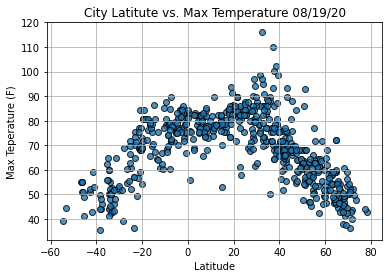

In [68]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           max_temps, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Teperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

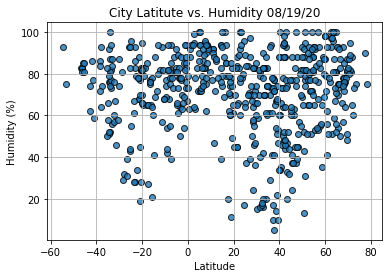

In [69]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, 
           humidity, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

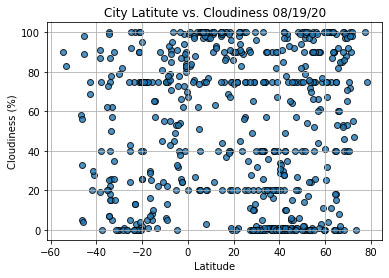

In [70]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

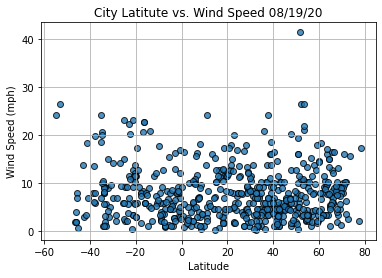

In [71]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [106]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [79]:
index13 = city_data_df.loc[13]
index13

City                    Road Town
Country                        VG
Date          2020-08-20 00:09:56
Lat                         18.42
Lng                        -64.62
Max Temp                     84.2
Humidity                       74
Cloudiness                     40
Wind Speed                  11.41
Name: 13, dtype: object

In [80]:
city_data_df["Lat"]>= 0

0      False
1       True
2      False
3      False
4       True
       ...  
581     True
582     True
583     True
584     True
585    False
Name: Lat, Length: 586, dtype: bool

In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [82]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tasiilaq,GL,2020-08-20 00:13:20,65.61,-37.64,44.6,75,0,12.75
4,Kapaa,US,2020-08-20 00:13:21,22.08,-159.32,84.2,66,1,14.99
5,Pacific Grove,US,2020-08-20 00:13:21,36.62,-121.92,77.0,41,90,4.70
6,Prince Rupert,CA,2020-08-20 00:12:13,54.32,-130.32,57.2,100,90,2.24
7,Aklavik,CA,2020-08-20 00:13:21,68.22,-135.01,60.8,72,40,3.36


In [77]:
# southern_hemi_df.head()

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                       for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-113-977cc754848a>, line 6)

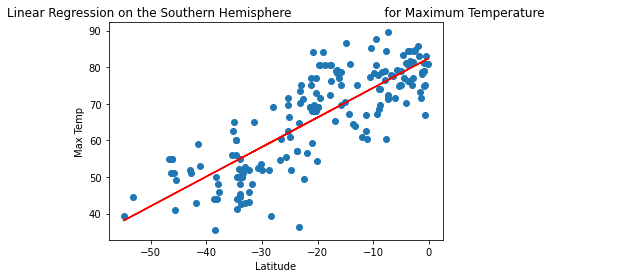

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 
                       'Max Temp',(10,40))

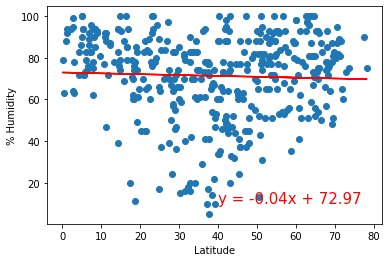

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

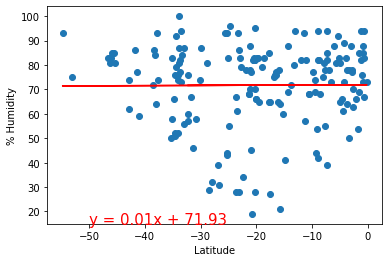

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

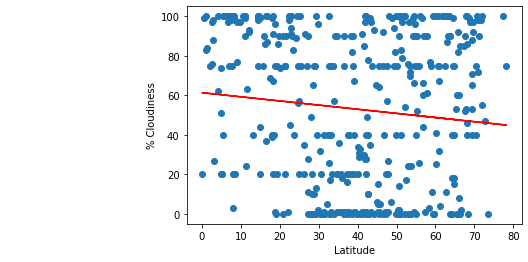

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,15))

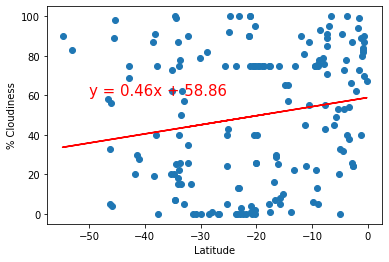

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-98-7024af74f12d>, line 6)

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))